In [17]:
from gurobipy import Model
import matplotlib.pyplot as plt
import numpy as np

In [18]:
def fun(x):
    return np.sqrt(x) + np.sin(x) + 10*np.exp(-x)

In [19]:
x = np.linspace(2, 20, 100)
y = fun(x)

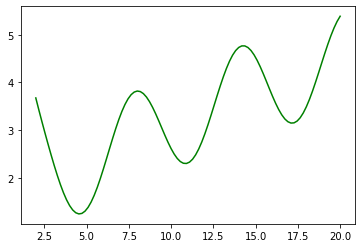

In [20]:
fig = plt.figure()
plt.plot(x, y, 'g')
plt.show()

# Gleichmäßige Diskretisierung der x-Werte

In [21]:
x_vals = list(range(2,22,2))
y_vals = [fun(x) for x in x_vals]

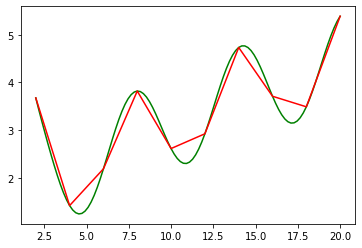

In [22]:
plt.plot(x, y, 'g')
plt.plot(x_vals, y_vals, 'r')
plt.show()

# Optimization Model

In [23]:
m = Model('x discretization')
xvar = m.addVar()
m.setPWLObj(xvar, x_vals, y_vals)
m.optimize()

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (win64)
Optimize a model with 0 rows, 1 columns and 0 nonzeros
Model fingerprint: 0x0dd39386
Model has 1 piecewise-linear objective term
Variable types: 1 continuous, 0 integer (0 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 5.9273737
Presolve time: 0.00s
Presolved: 17 rows, 19 columns, 42 nonzeros
Presolved model has 1 SOS constraint(s)
Variable types: 10 continuous, 9 integer (9 binary)

Root relaxation: objective 1.426354e+00, 8 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0       1.4263539    1.42635  0.00%     -    0s

Explored 0 nodes (8 simplex iterations) in 0.00 seconds
Thread count was 16 (of 16 available processors)


In [24]:
xvar.X

4.0

# Gleichmäßige Diskretisierung der y-Werte

## Bestimmung der Wertebereiche

Auf dem Definitionsbereich [2, 20] besitzen die Funktionen die folgenden Wertebereiche:

1. $\sqrt{x}:\ [\sqrt{2}, \sqrt{20}]$
2. $\sin(x):\ [-1, 1]$
3. $10e^{-x}:\ [10e^{-20}, 10e^{-2}]$

## Bestimmung der Diskretisierungspunkte

Wir bestimmen für jede der Funktionen alle x-Werte, die zu den Intervallenden sowie zur Intervallmitte gehören:
1. $\sqrt{x}$

In [25]:
x_vals = [2, ((np.sqrt(20)+np.sqrt(2))/2)**2, 20]

2. $\sin{x}$

In [26]:
# y = -1
x_vals.extend([3/2*np.pi + k*2*np.pi for k in range(3)])
# y = 0
x_vals.extend([k*np.pi for k in range(1, 7)])
# y = 1
x_vals.extend([1/2*np.pi + k*2*np.pi for k in range(1, 3)])

3. $10e^{-x}$

In [27]:
x_vals.extend([2, -np.log((10*np.exp(-2)+10*np.exp(-20))/20), 20])

Delete duplicates

In [28]:
x_vals = sorted(list(set(x_vals)))
y_vals = [fun(x) for x in x_vals]

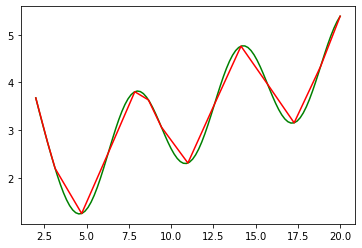

In [29]:
plt.plot(x, y, 'g')
plt.plot(x_vals, y_vals, 'r')
plt.show()

# Optimization Model

In [30]:
m = Model('y discretization')
xvar = m.addVar()
m.setPWLObj(xvar, x_vals, y_vals)
m.optimize()

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (win64)
Optimize a model with 0 rows, 1 columns and 0 nonzeros
Model fingerprint: 0x1895c855
Model has 1 piecewise-linear objective term
Variable types: 1 continuous, 0 integer (0 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 6.3474108
Presolve time: 0.00s
Presolved: 27 rows, 29 columns, 67 nonzeros
Presolved model has 1 SOS constraint(s)
Variable types: 15 continuous, 14 integer (14 binary)

Root relaxation: objective 1.260637e+00, 18 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0       1.2606367    1.26064  0.00%     -    0s

Explored 0 nodes (18 simplex iterations) in 0.00 seconds
Thread count was 16 (of 16 available processo

In [31]:
xvar.X

4.71238898038469